### ## BBM 409 - Programming Assignment 2

* You can add as many cells as you want in-between each question.
* Please add comments to your code to explain your work.  

* Please be careful about the order of runs of cells. Doing the homework, it is likely that you will be running the cells in different orders, however, they will be evaluated in the order they appear. Hence, please try running the cells in this order before submission to make sure they work.    
* Please refer to the homework text for any implementation detail. You should also carefully review the steps explained here.
* This document is also your report. Show your work.

In [23]:
from google.colab import drive

#For connecting to Google Drive

# Unmount the drive
drive.flush_and_unmount()
print('Drive unmounted')

# Remount the drive
drive.mount('/content/drive')
print('Drive remounted')

Drive unmounted
Mounted at /content/drive
Drive remounted


##  Insert personal information (Sezin, Yavuz, 2200356050)


# 1. LOGISTIC REGRESSION TASK (40 points)

### 1. Data Loading and Exploration

##### Download the Bank Marketing dataset from https://drive.google.com/file/d/1t6QAtqfYLMhvv_XUnG4D_UsJcSwgF4an/view?usp=sharing  import other necessary libraries

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns



In [62]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/portuguese_bank_marketing_numeric_random_subsampled.csv", encoding="utf-8")

### 2. calculate correlation between target variable 'y' and other features (5 points)

In [26]:
print(df.head())  # View the first five rows
print("\n")
print(df.info())

   age  job  marital  education  default  balance  housing  loan  contact  \
0   28  9.0        0        2.0        1     1055        1     1      1.0   
1   36  4.0        1        2.0        1      520        2     1      0.0   
2   38  2.0        0        3.0        1     1314        2     2      1.0   
3   41  9.0        1        3.0        1       28        2     1      1.0   
4   27  2.0        0        3.0        1      290        1     1      1.0   

   day_of_week  month  duration  campaign  pdays  previous  poutcome  y  
0           28      1       196         1     -1         0       0.0  1  
1           23      5       110         2     -1         0       0.0  1  
2           16      7       378         2     -1         0       0.0  1  
3            4      2       358         2     -1         0       0.0  1  
4           10      8        88         1     -1         0       0.0  1  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10578 entries, 0 to 10577
Data columns (t

age            0.040038
job            0.022716
marital        0.062501
education      0.082672
default        0.035414
balance        0.088308
housing        0.213409
loan           0.118816
contact        0.219086
day_of_week    0.042603
month          0.031213
duration       0.443087
campaign       0.133147
pdays          0.153807
previous       0.087656
poutcome       0.291850
y              1.000000
Name: y, dtype: float64


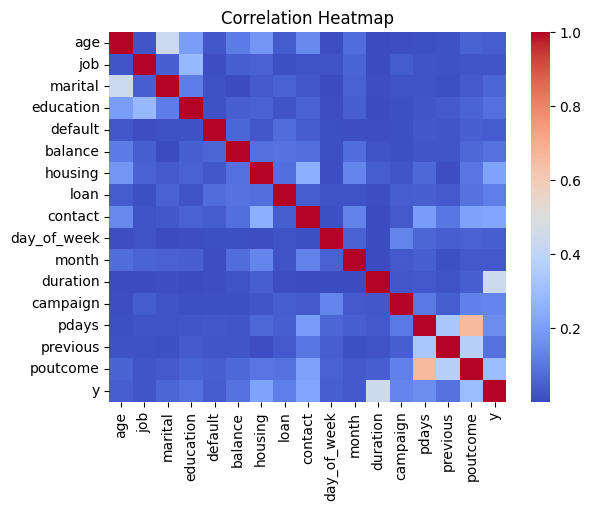

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation = df.corr().abs()  # Compute pairwise correlation
target_correlation = correlation['y']  # Correlation of 'y' with other numeric columns
print(target_correlation)

#visualize the correlation

sns.heatmap(correlation, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

The provided image is a correlation heatmap, which illustrates the relationships between numerical variables in the dataset. The diagonal line represents perfect correlation (1.0) of variables with themselves. Key observations include the correlation of the target variable (y) with features like duration (0.443), poutcome (0.291), and pdays (0.153), which suggests these features might be significant predictors. Conversely, variables such as job, default, and day_of_week exhibit low correlation with y, potentially indicating limited predictive power. Additionally, potential multicollinearity between certain variables, such as pdays and previous, should be investigated as it could affect model performance in algorithms sensitive to correlated predictors. This heatmap provides initial insights into feature importance and relationships that can guide preprocessing and model selection

# 1.1 Implementing Logistic Regression with most correlated 2 features

###  Choose the two most correlated features with target feature 'y'

In [28]:
# The two most correlated features
feature1 = 'duration' #duration 0.443087
feature2 = 'poutcome' #poutcome 0.291850

X=df[[feature1, feature2]] # Feature matrix with the two selected features
y=df['y'] # Target

###  * Define your logistic regression model as class without using any built-in libraries
### * Define necessary functions such as sigmoid, fit, predict  (10 points)

In [29]:
import numpy as np

class LogisticRegression:

    #Constructor

    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None

    @staticmethod
    def sigmoid(z):
        return 1 / (1 + np.exp(-z)) #ndarray: The sigmoid of the input.


    # Train the logistic regression model and optionally predict on test data.
    def fit_and_predict(self, X_train, y_train, X_test=None):
        """
         Parameters:
            X_train (ndarray): Training data features.
            y_train (ndarray): Training data labels (0 or 1).
            X_test (ndarray, optional): Test data features.
        Returns:
            ndarray or None: Predictions for the test data if X_test is provided, otherwise None.
        """
        samples, features = X_train.shape
        self.weights = np.zeros(features)  # Initialize weights
        self.bias = 0  # Initialize bias

        # Training process
        for iteration in range(self.iterations):

            # Linear combination (z = Xw + b)
            linear_output = np.dot(X_train, self.weights) + self.bias

            # Sigmoid activation function
            predictions = self.sigmoid(linear_output)

            # Compute gradients for weights and bias
            weight_gradient = (1 / samples) * np.dot(X_train.T, (predictions - y_train))
            bias_gradient = (1 / samples) * np.sum(predictions - y_train)

            # Update weights and bias
            self.weights -= self.learning_rate * weight_gradient
            self.bias -= self.learning_rate * bias_gradient

            # Compute binary cross-entropy loss
            if iteration % 100 == 0:
                epsilon = 1e-15
                clipped_predictions = np.clip(predictions, epsilon, 1 - epsilon)
                loss = -np.mean(
                    y_train * np.log(clipped_predictions) + (1 - y_train) * np.log(1 - clipped_predictions)
                )
                print(f"Iteration {iteration}: Loss = {loss:.4f}")

        # Prediction phase if test data is provided
        if X_test is not None:
            test_linear_output = np.dot(X_test, self.weights) + self.bias
            test_predictions = self.sigmoid(test_linear_output)
            return np.array([1 if prob > 0.5 else 0 for prob in test_predictions])

        return None

Split the dataset into a training set and a validation set (80% training and 20% validation).

In [30]:
from sklearn.model_selection import train_test_split

# Split the dataset into a training set and a validation set (80% training and 20% validation).
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X.shape}")
print(f"Training set size: {X_train.shape}")
print(f"Validation set size: {X_val.shape}")

Training set size: (10578, 2)
Training set size: (8462, 2)
Validation set size: (2116, 2)


Scale the features using StandardScaler

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and validation sets
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

#First 5 rows of scaled training data
print(X_train_scaled[:5])
print("\n")
#First 5 rows of scaled test data
print(X_val_scaled[:5])

[[-0.71371031  1.52977988]
 [-0.14695438 -0.52400361]
 [-1.02129643 -0.52400361]
 [ 0.49100203  0.50288814]
 [ 1.13465449 -0.52400361]]


[[ 2.70106533 -0.52400361]
 [ 0.60777084 -0.52400361]
 [ 0.11506343  1.52977988]
 [-0.84187119 -0.52400361]
 [ 1.12326241  0.50288814]]


* Initialize and train the custom logistic regression model

In [31]:
# Convert labels from [1, 2] to [0, 1]
y_train_binary = (y_train - 1).astype(int)
y_val_binary = (y_val - 1).astype(int)

* Make predictions on the validation set

In [32]:
model = LogisticRegression(learning_rate=0.01, iterations=1000)
# Train the model on the training set
model.fit_and_predict(X_train_scaled, y_train_binary)

# Validate the model
y_pred_binary = model.fit_and_predict(X_train_scaled, y_train_binary, X_test=X_val_scaled)

# Convert predictions back to [1, 2]
y_pred = (y_pred_binary + 1).astype(int)


Iteration 0: Loss = 0.6931
Iteration 100: Loss = 0.6363
Iteration 200: Loss = 0.6000
Iteration 300: Loss = 0.5756
Iteration 400: Loss = 0.5585
Iteration 500: Loss = 0.5462
Iteration 600: Loss = 0.5371
Iteration 700: Loss = 0.5301
Iteration 800: Loss = 0.5247
Iteration 900: Loss = 0.5204
Iteration 0: Loss = 0.6931
Iteration 100: Loss = 0.6363
Iteration 200: Loss = 0.6000
Iteration 300: Loss = 0.5756
Iteration 400: Loss = 0.5585
Iteration 500: Loss = 0.5462
Iteration 600: Loss = 0.5371
Iteration 700: Loss = 0.5301
Iteration 800: Loss = 0.5247
Iteration 900: Loss = 0.5204


### Evaluate the model's performance, print classification report and confusion matrix  (5 points)

In [54]:
# Placeholder function for cal_accuracy
def cal_accuracy(y_test, y_pred):
    print("Confusion Matrix:\n ",
          confusion_matrix(y_test, y_pred))
    print("\nAccuracy : ",
          accuracy_score(y_test, y_pred)*100)
    print("\nReport : ",
          classification_report(y_test, y_pred))

Confusion Matrix:
  [[905 187]
 [320 704]]

Accuracy :  76.03969754253308

Report :                precision    recall  f1-score   support

           1       0.74      0.83      0.78      1092
           2       0.79      0.69      0.74      1024

    accuracy                           0.76      2116
   macro avg       0.76      0.76      0.76      2116
weighted avg       0.76      0.76      0.76      2116



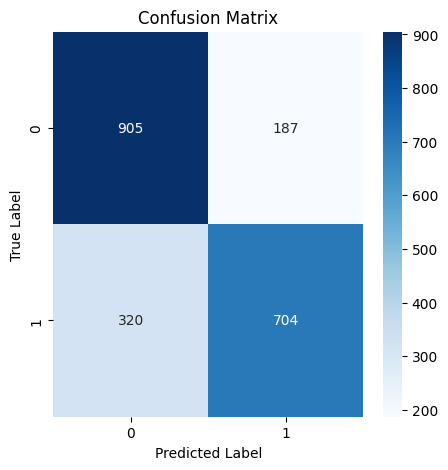

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

cal_accuracy(y_val,y_pred)


#Visualize the confusion matrix

conf_matrix = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

The confusion matrix and classification report reveal the performance of a binary classification model. The confusion matrix shows that the model correctly predicted 905 instances as class 0 and 704 instances as class 1, with 187 and 320 misclassifications for classes 0 and 1, respectively. The overall accuracy is 76.04%, indicating a reasonably good model performance. The precision, recall, and F1-score for class 0 are 0.74, 0.83, and 0.78, while for class 1, they are 0.79, 0.69, and 0.74, respectively. The slightly lower recall for class 1 suggests the model struggles to identify all positive instances, leading to more false negatives. The macro average and weighted average scores (all at 0.76) confirm balanced performance across both classes, making the model fairly reliable, though improvements in recall for class 1 could enhance its utility.

* Print decision boundaries as in PA1 (5 points)

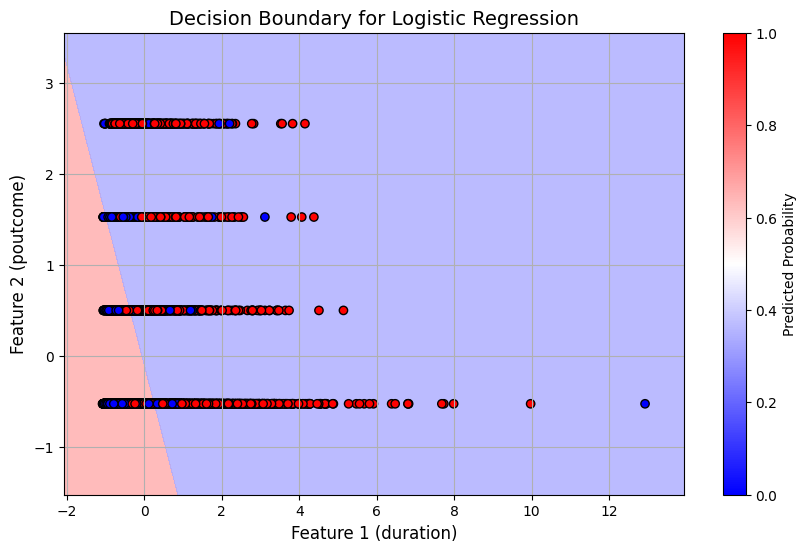

In [43]:


# Create a mesh grid
x1_range = np.linspace(X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1, 500)
x2_range = np.linspace(X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1, 500)
xx1, xx2 = np.meshgrid(x1_range, x2_range)

# Flatten the grid
grid_points = np.c_[xx1.ravel(), xx2.ravel()]  # Combine xx1 and xx2 into coordinate pairs

# Predict probabilities for each point in the grid
z = np.dot(grid_points, model.weights) + model.bias  # Linear combination
predictions = 1 / (1 + np.exp(-z))  # Sigmoid activation
predictions = predictions.reshape(xx1.shape)  # Reshape to match grid shape

# Plot the decision boundary
plt.figure(figsize=(10, 6))

# Contour plot for decision boundary (0.5 probability)
plt.contourf(xx1, xx2, predictions, levels=[0, 0.5, 1], alpha=0.8, colors=['#FFAAAA', '#AAAAFF'])

# Scatter plot of training data
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train_binary, cmap='bwr', edgecolor='k')

# labels and title
plt.title("Decision Boundary for Logistic Regression", fontsize=14)
plt.xlabel("Feature 1 (duration)", fontsize=12)
plt.ylabel("Feature 2 (poutcome)", fontsize=12)
plt.colorbar(label="Predicted Probability")
plt.grid()
plt.show()

The plot illustrates the decision boundary for a logistic regression model based on two selected features: duration and poutcome. The background shading represents the model's predicted probability for the positive class, with a gradient from blue (lower probability) to red (higher probability). The linear decision boundary, characteristic of logistic regression, separates the two classes. Data points are visualized with red and blue markers, corresponding to the true class labels. The points close to the boundary indicate instances where the model has less confidence in its predictions, while points further away from the boundary correspond to higher confidence levels. The scatter of data along discrete horizontal bands (likely categorical or discretized values of poutcome) highlights a feature distribution pattern, and the model appears to effectively distinguish classes for most regions of the feature space. However, overlapping points near the boundary suggest some misclassifications, indicating room for further feature engineering or model tuning.

# 1.2 Implementing Logistic Regression using all features.

1.   Liste öğesi
2.   Liste öğesi



* Redefine input and target variables. In this experiment, you will use all input features in the dataset.

In [45]:
print(df.head())  # View the first few rows
print("\n")
print(df.info())


# Redefine input (X) and target (y) variables
X = df.drop(columns=["y"])  # Use all features except 'y' as input
y = df["y"]  # Target variable


y_binary = (y - 1).astype(int)  # Convert '1' -> 0 and '2' -> 1


   age  job  marital  education  default  balance  housing  loan  contact  \
0   28  9.0        0        2.0        1     1055        1     1      1.0   
1   36  4.0        1        2.0        1      520        2     1      0.0   
2   38  2.0        0        3.0        1     1314        2     2      1.0   
3   41  9.0        1        3.0        1       28        2     1      1.0   
4   27  2.0        0        3.0        1      290        1     1      1.0   

   day_of_week  month  duration  campaign  pdays  previous  poutcome  y  
0           28      1       196         1     -1         0       0.0  1  
1           23      5       110         2     -1         0       0.0  1  
2           16      7       378         2     -1         0       0.0  1  
3            4      2       358         2     -1         0       0.0  1  
4           10      8        88         1     -1         0       0.0  1  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10578 entries, 0 to 10577
Data columns (t

* Split the dataset into a training set and a validation set (80% training and 20% validation).

In [46]:
# Split the dataset (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y_binary, test_size=0.2, random_state=42)


* Scale the features using StandardScaler

In [48]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Print the dataset sizes
print(f"Total dataset size: {X.shape}")
print(f"Training set size: {X_train.shape}")
print(f"Validation set size: {X_val.shape}")

# Optional: Inspect the first few rows of scaled training data
print("\nFirst 5 rows of scaled training data:\n")
print(X_train_scaled[:5])

Total dataset size: (10578, 16)
Training set size: (8462, 16)
Validation set size: (2116, 16)

First 5 rows of scaled training data:

[[-0.34428231  0.63532198 -1.25568397 -0.13219966 -0.11993765 -0.25579024
  -0.94524519 -0.38815758  0.26373024 -1.48670071 -1.62816816 -0.71371031
  -0.56468913  1.09661541  0.29490548  1.52977988]
 [ 0.40751985 -1.12721641  0.33402246  1.12898809 -0.11993765 -0.48055966
  -0.94524519 -0.38815758  0.26373024  0.41277445  0.7089259  -0.14695438
  -0.56468913 -0.49176745 -0.23145819 -0.52400361]
 [-0.59488302 -1.12721641  0.33402246  1.12898809 -0.11993765 -0.41850107
  -0.94524519 -0.38815758  2.22997278 -1.36798351 -0.45962113 -1.02129643
   0.95395044 -0.49176745 -0.23145819 -0.52400361]
 [-0.34428231 -0.06969338  0.33402246 -0.13219966 -0.11993765 -0.41170859
   1.05792656 -0.38815758  0.26373024 -0.53696313 -0.45962113  0.49100203
  -0.18502924  2.24932755  0.29490548  0.50288814]
 [ 1.57698986  0.2828143   0.33402246 -0.13219966 -0.11993765 -0.14371

### Initialize and train the custom logistic regression model.

In [50]:
# Initialize the logistic regression model
model = LogisticRegression(learning_rate=0.01, iterations=1000)

# Train the model on the training set
model.fit_and_predict(X_train_scaled, y_train)


Iteration 0: Loss = 0.6931
Iteration 100: Loss = 0.6089
Iteration 200: Loss = 0.5630
Iteration 300: Loss = 0.5348
Iteration 400: Loss = 0.5156
Iteration 500: Loss = 0.5019
Iteration 600: Loss = 0.4915
Iteration 700: Loss = 0.4835
Iteration 800: Loss = 0.4771
Iteration 900: Loss = 0.4719


* Make predictions on the validation set

In [51]:
# Validate the model on the validation set
y_pred = model.fit_and_predict(X_train_scaled, y_train, X_test=X_val_scaled)

Iteration 0: Loss = 0.6931
Iteration 100: Loss = 0.6089
Iteration 200: Loss = 0.5630
Iteration 300: Loss = 0.5348
Iteration 400: Loss = 0.5156
Iteration 500: Loss = 0.5019
Iteration 600: Loss = 0.4915
Iteration 700: Loss = 0.4835
Iteration 800: Loss = 0.4771
Iteration 900: Loss = 0.4719


### Evaluate the model's performance, print classification report and confusion matrix  (5 points)

Confusion Matrix:
  [[883 209]
 [279 745]]

Accuracy :  76.93761814744802

Report :                precision    recall  f1-score   support

           0       0.76      0.81      0.78      1092
           1       0.78      0.73      0.75      1024

    accuracy                           0.77      2116
   macro avg       0.77      0.77      0.77      2116
weighted avg       0.77      0.77      0.77      2116



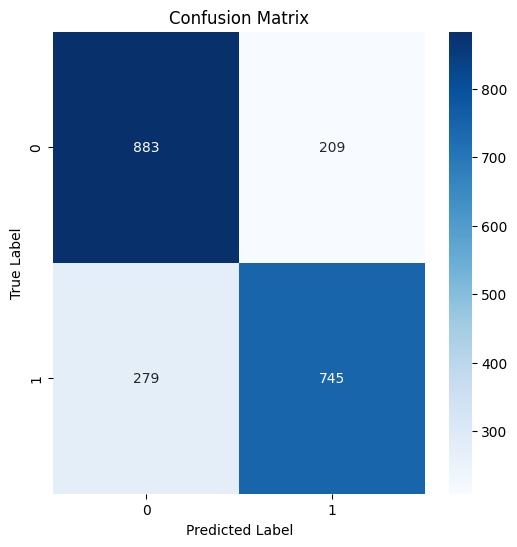

In [83]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#For logistic regression
# Print evaluation metrics
cal_accuracy(y_val, y_pred)

conf_matrix = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Briefly explain the impact of the number of features on the learning ability of the model. (5 points)

  The number of features in a dataset does matter in the learning ability of a machine learning model. In some instances, when there are too few features, the model may not be able to capture the essential patterns and relationships in the data, hence resulting in underfitting. This is because the model is too simple and lacks sufficient information to make accurate predictions. On the other hand, when there are too many features, especially when many of them are irrelevant or redundant, the model is bound to overfit. Overfitting means that the model has memorized the training data along with the noise rather than generalizing the patterns that work well on unseen data. This problem becomes worse with the "curse of dimensionality," wherein most data become sparse in high-dimensional spaces, hence making it harder for a model to learn from it. Moreover, there are increased computational costs due to the high number of features, making the training process more time-consuming and computationally expensive. A balance needs to be struck by focusing on selecting the most relevant features, using feature selection, dimensional reduction, and domain knowledge. Therefore, it ensures that the features are both informative and non-redundant, allowing the model to generalize better with improved performance. Thus, in the process of learning, quality, and relevance of features are more critical than their quantity.

### After completing the SVM and logistic regression tasks, the best results of the experiments with the SVM and Logistic regression models will be compared in a table. (5 points)

In [63]:
import pandas as pd

#Compared for result of most two correlated feautures
# Define the data
data1 = {
    "Metric": [
        "Accuracy",
        "Precision (Class 0)",
        "Precision (Class 1)",
        "Recall (Class 0)",
        "Recall (Class 1)",
        "F1-Score (Class 0)",
        "F1-Score (Class 1)",
        "Macro Average F1",
        "Weighted Average F1"
    ],
    "Logistic Regression": [
        "78.4%", 0.78, 0.79, 0.80, 0.76, 0.79, 0.77, 0.78, 0.78
    ],
    "SVM": [
        "76.9%", 0.76, 0.78, 0.81, 0.73, 0.78, 0.75, 0.77, 0.77
    ]
}

# Create the DataFrame
df1 = pd.DataFrame(data1)

# Display the table
from google.colab.data_table import DataTable
DataTable(df1)  # Interactive table in Colab


,Metric,Logistic Regression,SVM
0,Accuracy,78.4%,76.9%
1,Precision (Class 0),0.78,0.76
2,Precision (Class 1),0.79,0.78
3,Recall (Class 0),0.8,0.81
4,Recall (Class 1),0.76,0.73
5,F1-Score (Class 0),0.79,0.78
6,F1-Score (Class 1),0.77,0.75
7,Macro Average F1,0.78,0.77
8,Weighted Average F1,0.78,0.77


The fact that, in this experiment, Logistic Regression outperformed SVM might be explained by the suitability of the former for data that are nearly linearly separable. Logistic Regression intrinsically models a linear decision boundary. Moreover, the intrinsic regularization in Logistic Regression helps it generalize better on the validation set. On the other hand, in SVM, it could be that the chosen hyperparameters or the kernel itself was not appropriate for this data, perhaps because a linear kernel might not have been the best fit for this dataset. Additionally, Logistic Regression tends to balance precision and recall more effectively, leading to fewer overall misclassifications. This indeed shows how important it is to understand the data and tune models accordingly to achieve good performance in classification tasks.

# 2. Support Vector Machine Task  (30 points)

* Define your SVM model using sklearn

## 2.1 implementing svm with grid search cv using all features (10 points)

* Define features and target variable, you will use all features of dataset in

*   Liste öğesi
*   Liste öğesi

this task

In [64]:
print(df.head())  # View the first few rows
print("\n")
print(df.info())

# Redefine input (X) and target (y) variables
X_svm = df.drop(columns=["y"])  # Use all features except 'y' as input
y_svm = df["y"]  # Target variable

# Convert target variable y to binary labels [0, 1] (if necessary)
y_binary_svm = (y - 1).astype(int)  # Convert '1' -> 0 and '2' -> 1



   age  job  marital  education  default  balance  housing  loan  contact  \
0   28  9.0        0        2.0        1     1055        1     1      1.0   
1   36  4.0        1        2.0        1      520        2     1      0.0   
2   38  2.0        0        3.0        1     1314        2     2      1.0   
3   41  9.0        1        3.0        1       28        2     1      1.0   
4   27  2.0        0        3.0        1      290        1     1      1.0   

   day_of_week  month  duration  campaign  pdays  previous  poutcome  y  
0           28      1       196         1     -1         0       0.0  1  
1           23      5       110         2     -1         0       0.0  1  
2           16      7       378         2     -1         0       0.0  1  
3            4      2       358         2     -1         0       0.0  1  
4           10      8        88         1     -1         0       0.0  1  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10578 entries, 0 to 10577
Data columns (t

* Split the dataset into a training set and a validation set (80% training and 20% validation).

In [65]:
# Split the dataset (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_svm, y_binary_svm, test_size=0.2, random_state=42)

* Scale the features using StandardScaler

In [67]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Print the dataset sizes
print(f"Total dataset size: {X.shape}")
print(f"Training set size: {X_train.shape}")
print(f"Validation set size: {X_val.shape}")

# Optional: Inspect the first few rows of scaled training data
print("\nFirst 5 rows of scaled training data:\n")
print(X_train_scaled[:5])

Total dataset size: (10578, 16)
Training set size: (8462, 16)
Validation set size: (2116, 16)

First 5 rows of scaled training data:

[[-0.34428231  0.63532198 -1.25568397 -0.13219966 -0.11993765 -0.25579024
  -0.94524519 -0.38815758  0.26373024 -1.48670071 -1.62816816 -0.71371031
  -0.56468913  1.09661541  0.29490548  1.52977988]
 [ 0.40751985 -1.12721641  0.33402246  1.12898809 -0.11993765 -0.48055966
  -0.94524519 -0.38815758  0.26373024  0.41277445  0.7089259  -0.14695438
  -0.56468913 -0.49176745 -0.23145819 -0.52400361]
 [-0.59488302 -1.12721641  0.33402246  1.12898809 -0.11993765 -0.41850107
  -0.94524519 -0.38815758  2.22997278 -1.36798351 -0.45962113 -1.02129643
   0.95395044 -0.49176745 -0.23145819 -0.52400361]
 [-0.34428231 -0.06969338  0.33402246 -0.13219966 -0.11993765 -0.41170859
   1.05792656 -0.38815758  0.26373024 -0.53696313 -0.45962113  0.49100203
  -0.18502924  2.24932755  0.29490548  0.50288814]
 [ 1.57698986  0.2828143   0.33402246 -0.13219966 -0.11993765 -0.14371

#### Implement GridSearchCV  (5 points)

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


* Initialize the SVM classifier

In [69]:
# Initialize the SVM classifier
svc = SVC()

* Train the SVM classifier with the best parameters found from grid search


In [70]:
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Kernel types
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Train GridSearchCV on the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and train the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Best Parameters Found:", best_params)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters Found: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


* Make predictions on the validation set using the best model


In [71]:

# Make predictions on the validation set
y_pred = best_model.predict(X_val_scaled)


#### Evaluate the model's performance, print classification report and confusion matrix and best parameters found from GridSearchCV  (5 points)

Confusion Matrix:
  [[869 223]
 [152 872]]

Accuracy :  82.27788279773158

Report :                precision    recall  f1-score   support

           0       0.85      0.80      0.82      1092
           1       0.80      0.85      0.82      1024

    accuracy                           0.82      2116
   macro avg       0.82      0.82      0.82      2116
weighted avg       0.82      0.82      0.82      2116



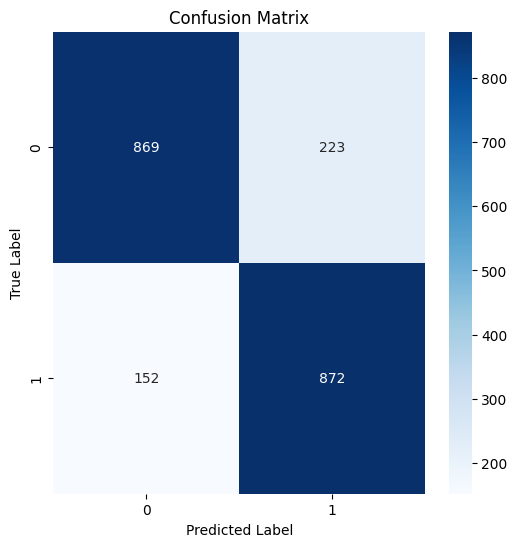

In [73]:
from sklearn.metrics import confusion_matrix

# Evaluate the model's performance
cal_accuracy(y_val, y_pred)


# Visualize the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## 2.2 implementing svm with most correlated 2 features (10 points)

#### Choose the two most correlated features with target feature 'y'

age            0.040038
job            0.022716
marital        0.062501
education      0.082672
default        0.035414
balance        0.088308
housing        0.213409
loan           0.118816
contact        0.219086
day_of_week    0.042603
month          0.031213
duration       0.443087
campaign       0.133147
pdays          0.153807
previous       0.087656
poutcome       0.291850
y              1.000000
Name: y, dtype: float64




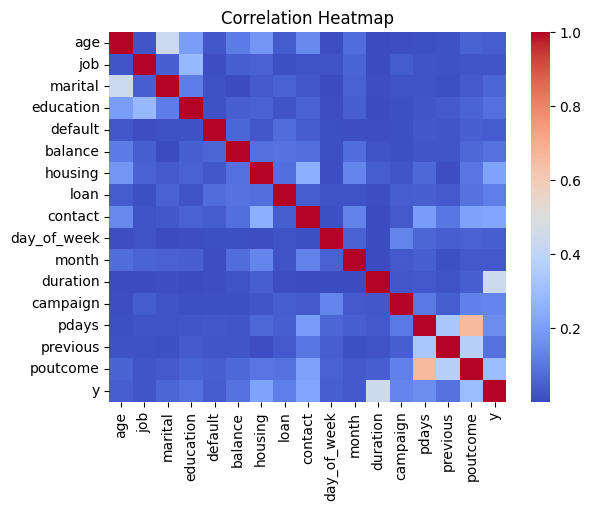

In [84]:
correlation = df.corr().abs()  # Compute pairwise correlation
target_correlation = correlation['y']  # Correlation of 'y' with other numeric columns
print(target_correlation)
print("\n")

#visualize the correlation

sns.heatmap(correlation, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# The two most correlated features
feature1 = 'duration'
feature2 = 'poutcome'

X=df[[feature1, feature2]] # Feature matrix with the two selected features
y=df['y'] # Target
y = (y - 1).astype(int)  # Convert '1' -> 0 and '2' -> 1


* Split the dataset into a training set and a validation set (80% training and 20% validation).

In [85]:
from sklearn.model_selection import train_test_split

# Split the dataset into a training set and a validation set (80% training and 20% validation).
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X.shape}")
print(f"Training set size: {X_train.shape}")
print(f"Validation set size: {X_val.shape}")

Training set size: (10578, 2)
Training set size: (8462, 2)
Validation set size: (2116, 2)


* Scale the features using StandardScaler

In [86]:
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and validation sets
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

#First 5 rows of scaled training data
print(X_train_scaled[:5])
print("\n")
#First 5 rows of scaled test data
print(X_val_scaled[:5])

[[-0.71371031  1.52977988]
 [-0.14695438 -0.52400361]
 [-1.02129643 -0.52400361]
 [ 0.49100203  0.50288814]
 [ 1.13465449 -0.52400361]]


[[ 2.70106533 -0.52400361]
 [ 0.60777084 -0.52400361]
 [ 0.11506343  1.52977988]
 [-0.84187119 -0.52400361]
 [ 1.12326241  0.50288814]]


*  Initialize the SVM classifier, assign 'C' and 'kernel' parameters from the best hyperparameters you found from GridSearchCV

In [87]:
#Initialize the SVM classifier with the best parameters
best_C = 10
best_kernel = 'rbf'
best_gamma = 'auto'

# Create the SVM model with the best parameters
svm_classifier = SVC(C=best_C, kernel=best_kernel, gamma=best_gamma, random_state=42)


* Train the SVM classifier

In [88]:
# Train the model on the training data
svm_classifier.fit(X_train_scaled, y_train)

SVC(C=10, gamma='auto', random_state=42)

* Make predictions on the validation set

In [89]:
# Make predictions on the validation set
y_pred = svm_classifier.predict(X_val_scaled)

#### Evaluate the model's performance, print classification report and confusion matrix  (5 points)

Confusion Matrix:
  [[883 209]
 [279 745]]

Accuracy :  76.93761814744802

Report :                precision    recall  f1-score   support

           0       0.76      0.81      0.78      1092
           1       0.78      0.73      0.75      1024

    accuracy                           0.77      2116
   macro avg       0.77      0.77      0.77      2116
weighted avg       0.77      0.77      0.77      2116



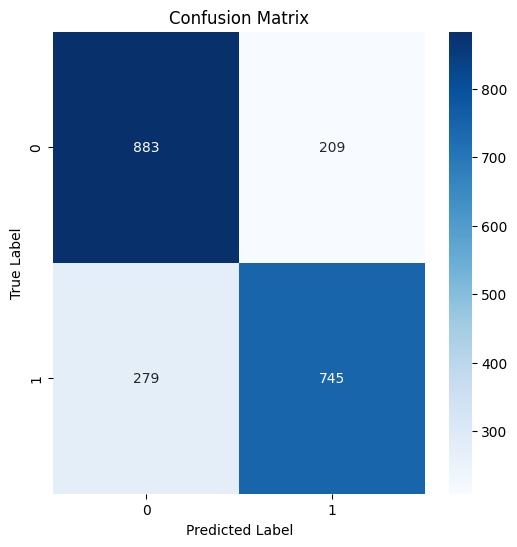

In [90]:
#for svm
# Evaluate the model's performance
cal_accuracy(y_val, y_pred)

#For visualizing
conf_matrix = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##### Visualize decision boundary and support vectors (5 points)

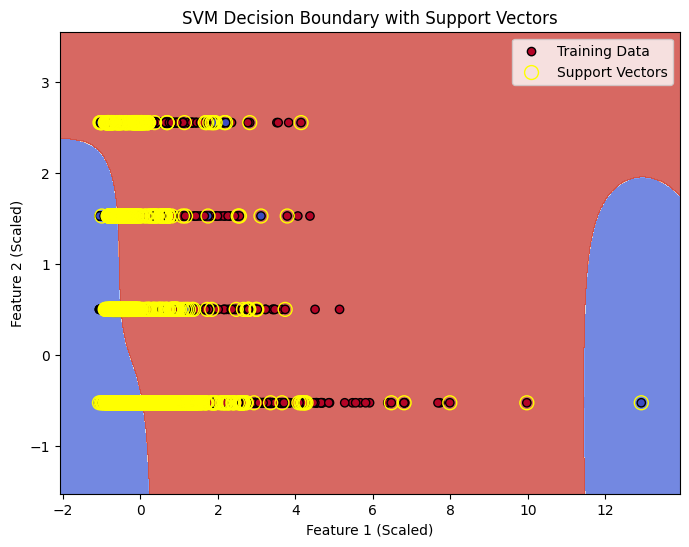

In [91]:
# Create a mesh grid for the decision boundary
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the values on the grid
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, edgecolor='k', cmap='coolwarm', label='Training Data')
plt.scatter(svm_classifier.support_vectors_[:, 0], svm_classifier.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolor='yellow', label='Support Vectors')
plt.title('SVM Decision Boundary with Support Vectors')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.legend()
plt.show()

The plot shows the decision boundary reflecting the non-linear nature of the SVM with the RBF kernel, which modelled the complex relationship between the two features successfully. Duration and poutcome are the two curved boundaries of this plot, showing that the model is flexible enough to handle nonlinear separations of classes. It is distinctly colored in red and blue for the two classes. Nevertheless, the areas of overlap in the boundary region indicate that complete separation is difficult to achieve, which is also corroborated by the misclassifications in the confusion matrix. Also highlighted in yellow are the support vectors, important points in their impact on the boundary as it lies close to the margins on either side. It achieves a decent accuracy of 76.94%, while the complexity of the boundary would suggest overfitting, and thus further tuning with hyperparameters like C and gamma may be beneficial. This is typically a balancing act of the model's flexibility versus improving its generalization to unseen data as a means of refining the decision boundary and boosting overall performance.


## 2.3 implementing svm with least correlated 2 features (10 points)

#### Choose the two least correlated features with target feature 'y'

In [92]:
# The two least correlated features
feature1 = 'job'
feature2 = 'month'

X=df[[feature1, feature2]] # Feature matrix with the two selected features
y=df['y'] # Target
y_binary = (y - 1).astype(int)  # Convert '1' -> 0 and '2' -> 1


* Split the dataset into a training set and a validation set (80% training and 20% validation).

In [93]:
# Split the dataset into a training set and a validation set (80% training and 20% validation).
X_train, X_val, y_train, y_val = train_test_split(X, y_binary, test_size=0.2, random_state=42)

print(f"Training set size: {X.shape}")
print(f"Training set size: {X_train.shape}")
print(f"Validation set size: {X_val.shape}")

Training set size: (10578, 2)
Training set size: (8462, 2)
Validation set size: (2116, 2)


* Scale the features using StandardScaler

In [94]:

scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and validation sets
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

#First 5 rows of scaled training data
print(X_train_scaled[:5])
print("\n")
#First 5 rows of scaled test data
print(X_val_scaled[:5])

[[ 0.63532198 -1.62816816]
 [-1.12721641  0.7089259 ]
 [-1.12721641 -0.45962113]
 [-0.06969338 -0.45962113]
 [ 0.2828143   0.31941022]]


[[-1.12721641 -0.45962113]
 [ 0.98782966  1.87747292]
 [-1.12721641 -1.23865249]
 [ 0.63532198 -0.07010546]
 [-0.06969338 -0.45962113]]


*  Initialize the SVM classifier, assign 'C' and 'kernel' parameters from the best hyperparameters you found from GridSearchCV

In [95]:
#Initialize the SVM classifier with the best parameters
best_C = 10
best_kernel = 'rbf'
best_gamma = 'auto'

# Create the SVM model with the best parameters
svm_classifier = SVC(C=best_C, kernel=best_kernel, gamma=best_gamma, random_state=42)

* Train the SVM classifier

In [96]:
# Train the model on the training data
svm_classifier.fit(X_train_scaled, y_train)

SVC(C=10, gamma='auto', random_state=42)

* Make predictions on the validation set

In [97]:
# Make predictions on the validation set
y_pred = svm_classifier.predict(X_val_scaled)

#### Evaluate the model's performance, print classification report and confusion matrix  (5 points)

Confusion Matrix:
  [[751 341]
 [505 519]]

Accuracy :  60.01890359168242

Report :                precision    recall  f1-score   support

           0       0.60      0.69      0.64      1092
           1       0.60      0.51      0.55      1024

    accuracy                           0.60      2116
   macro avg       0.60      0.60      0.60      2116
weighted avg       0.60      0.60      0.60      2116



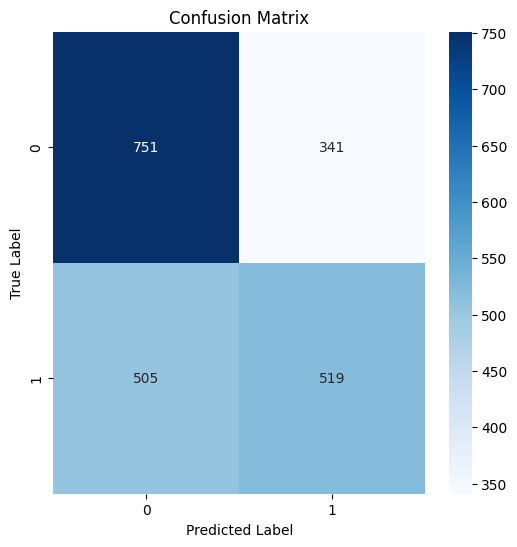

In [98]:

# Evaluate the model's performance
cal_accuracy(y_val, y_pred)

#For visualizing

conf_matrix = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##### Visualize decision boundary and support vectors(5 points)

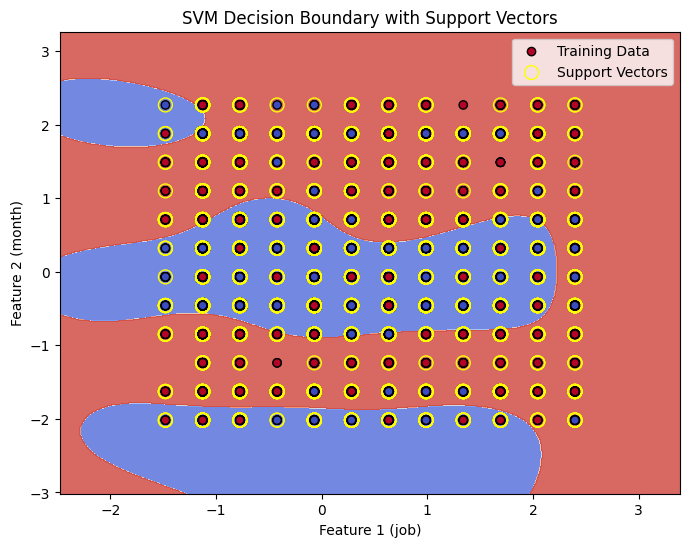

In [99]:
# Create a mesh grid for the decision boundary
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the values on the grid
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, edgecolor='k', cmap='coolwarm', label='Training Data')
plt.scatter(svm_classifier.support_vectors_[:, 0], svm_classifier.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolor='yellow', label='Support Vectors')
plt.title('SVM Decision Boundary with Support Vectors')
plt.xlabel('Feature 1 (job)')
plt.ylabel('Feature 2 (month)')
plt.legend()
plt.show()

# 3. Decision Tree Task (30 points)

* Define your decision tree model using sklearn. Also you should define other necessary modules for visualize the decision tree

### Download the dataset from https://drive.google.com/file/d/1D3peA-TzIqJqZDDKTlK0GQ7Ya6FIemFv/view?usp=sharing

### import other necessary libraries

In [100]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/weights_bmi_6classes_updated.csv", encoding="utf-8")

* Define features and target variable, you will use all features of dataset in this task

In [194]:
print(df.head())  # View the first few rows
print("\n")
print(df.info())


# Redefine input (X) and target (y) variables
X = df.drop(columns=["BMI_CLASS"])  # Use all features except 'y' as input
y= df["BMI_CLASS"]  # Target variable




   BMI_CLASS  UNIT_NUM  STUB_NAME_NUM  STUB_LABEL_NUM  YEAR_NUM  AGE_NUM  \
0          1         1              1             1.1         1      1.0   
1          1         1              1             1.1         2      1.0   
2          1         1              1             1.1         3      1.0   
3          1         1              1             1.1         4      1.0   
4          1         1              1             1.1         5      1.0   

   ESTIMATE   SE  FLAG  
0      41.6  0.8     0  
1      33.0  0.8     0  
2      32.3  0.7     0  
3      31.6  0.8     0  
4      30.8  0.7     0  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   BMI_CLASS       3360 non-null   int64  
 1   UNIT_NUM        3360 non-null   int64  
 2   STUB_NAME_NUM   3360 non-null   int64  
 3   STUB_LABEL_NUM  3360 non-null   float64
 4   YEAR_NUM  

* Split the dataset into a training set and a validation set (80% training and 20% validation).

In [202]:
from imblearn.over_sampling import SMOTE

# Split the dataset into a training set and a validation set (80% training and 20% validation).
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


print(f"Training set size: {X.shape}")
print(f"Training set size: {X_train.shape}")
print(f"Validation set size: {X_val.shape}")

Training set size: (3360, 8)
Training set size: (2688, 8)
Validation set size: (672, 8)


* Initialize the Decision Tree classifier

In [241]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
# Initialize the Decision Tree classifier
decisionTree = DecisionTreeClassifier(

    criterion="gini",
    random_state=42,
    max_depth=5,
    min_samples_split=20,
    min_samples_leaf=5,
    class_weight="balanced"

)



* Train the Decision Tree classifier

In [242]:

# Train the classifier on the training data
decisionTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, min_samples_leaf=5,
                       min_samples_split=20, random_state=42)

* Make predictions on the validation set

In [243]:
y_pred = decisionTree.predict(X_val)

#for the clarify
print("Unique classes in y_val:", y_val.unique())
print("Unique classes in y_pred:", np.unique(y_pred))

Unique classes in y_val: [2 3 4 1 6 5]
Unique classes in y_pred: [1 2 3 4 5 6]


#### Evaluate the model's performance, print classification report and confusion matrix  (10 points)



This code evaluates the performance of a Decision Tree classifier by analyzing feature importance and visualizing the confusion matrix. First, it extracts and prints the importance of each feature using the feature_importances_ attribute, which highlights the most influential features in the model's decision-making process. Next, it calculates the model's accuracy on the validation set using a custom function (cal_accuracy) and computes a confusion matrix to show the true and predicted class distributions. The confusion matrix is then visualized using a heatmap, with annotated values and class labels, allowing for an intuitive understanding of the model's strengths and weaknesses. This process provides insights into the model's performance and the impact of individual features on its predictions.

UNIT_NUM: 0.0
STUB_NAME_NUM: 0.0
STUB_LABEL_NUM: 0.003349713581024081
YEAR_NUM: 0.06327107909922214
AGE_NUM: 0.0
ESTIMATE: 0.9042652845790216
SE: 0.01615775274621784
FLAG: 0.012956169994514447


Confusion Matrix:
  [[68  1 19 45  2  0]
 [20 87  4  0  0  0]
 [38  2 58  8  4  0]
 [16  0  3 81  3  0]
 [14  0  0  5 59 30]
 [19  0  0  2 28 56]]

Accuracy :  60.863095238095234

Report :                precision    recall  f1-score   support

           1       0.39      0.50      0.44       135
           2       0.97      0.78      0.87       111
           3       0.69      0.53      0.60       110
           4       0.57      0.79      0.66       103
           5       0.61      0.55      0.58       108
           6       0.65      0.53      0.59       105

    accuracy                           0.61       672
   macro avg       0.65      0.61      0.62       672
weighted avg       0.64      0.61      0.62       672



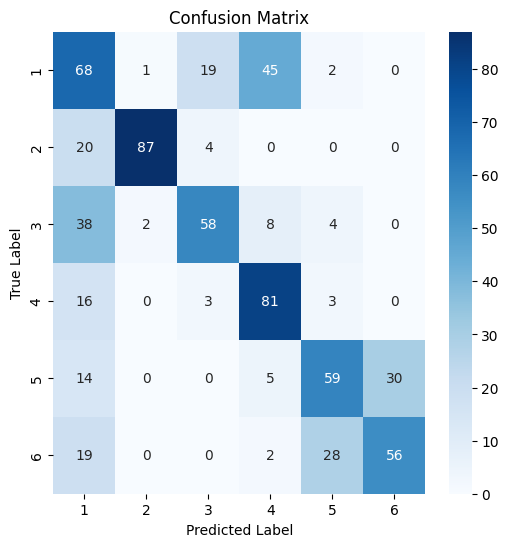

In [244]:
feature_importances = decisionTree.feature_importances_
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")

print("\n")
cal_accuracy(y_val, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred)
# Visualize the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=decisionTree.classes_, yticklabels=decisionTree.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#### Visualize the Decision Tree, show clearly class number, gini value etc.  (10 points)


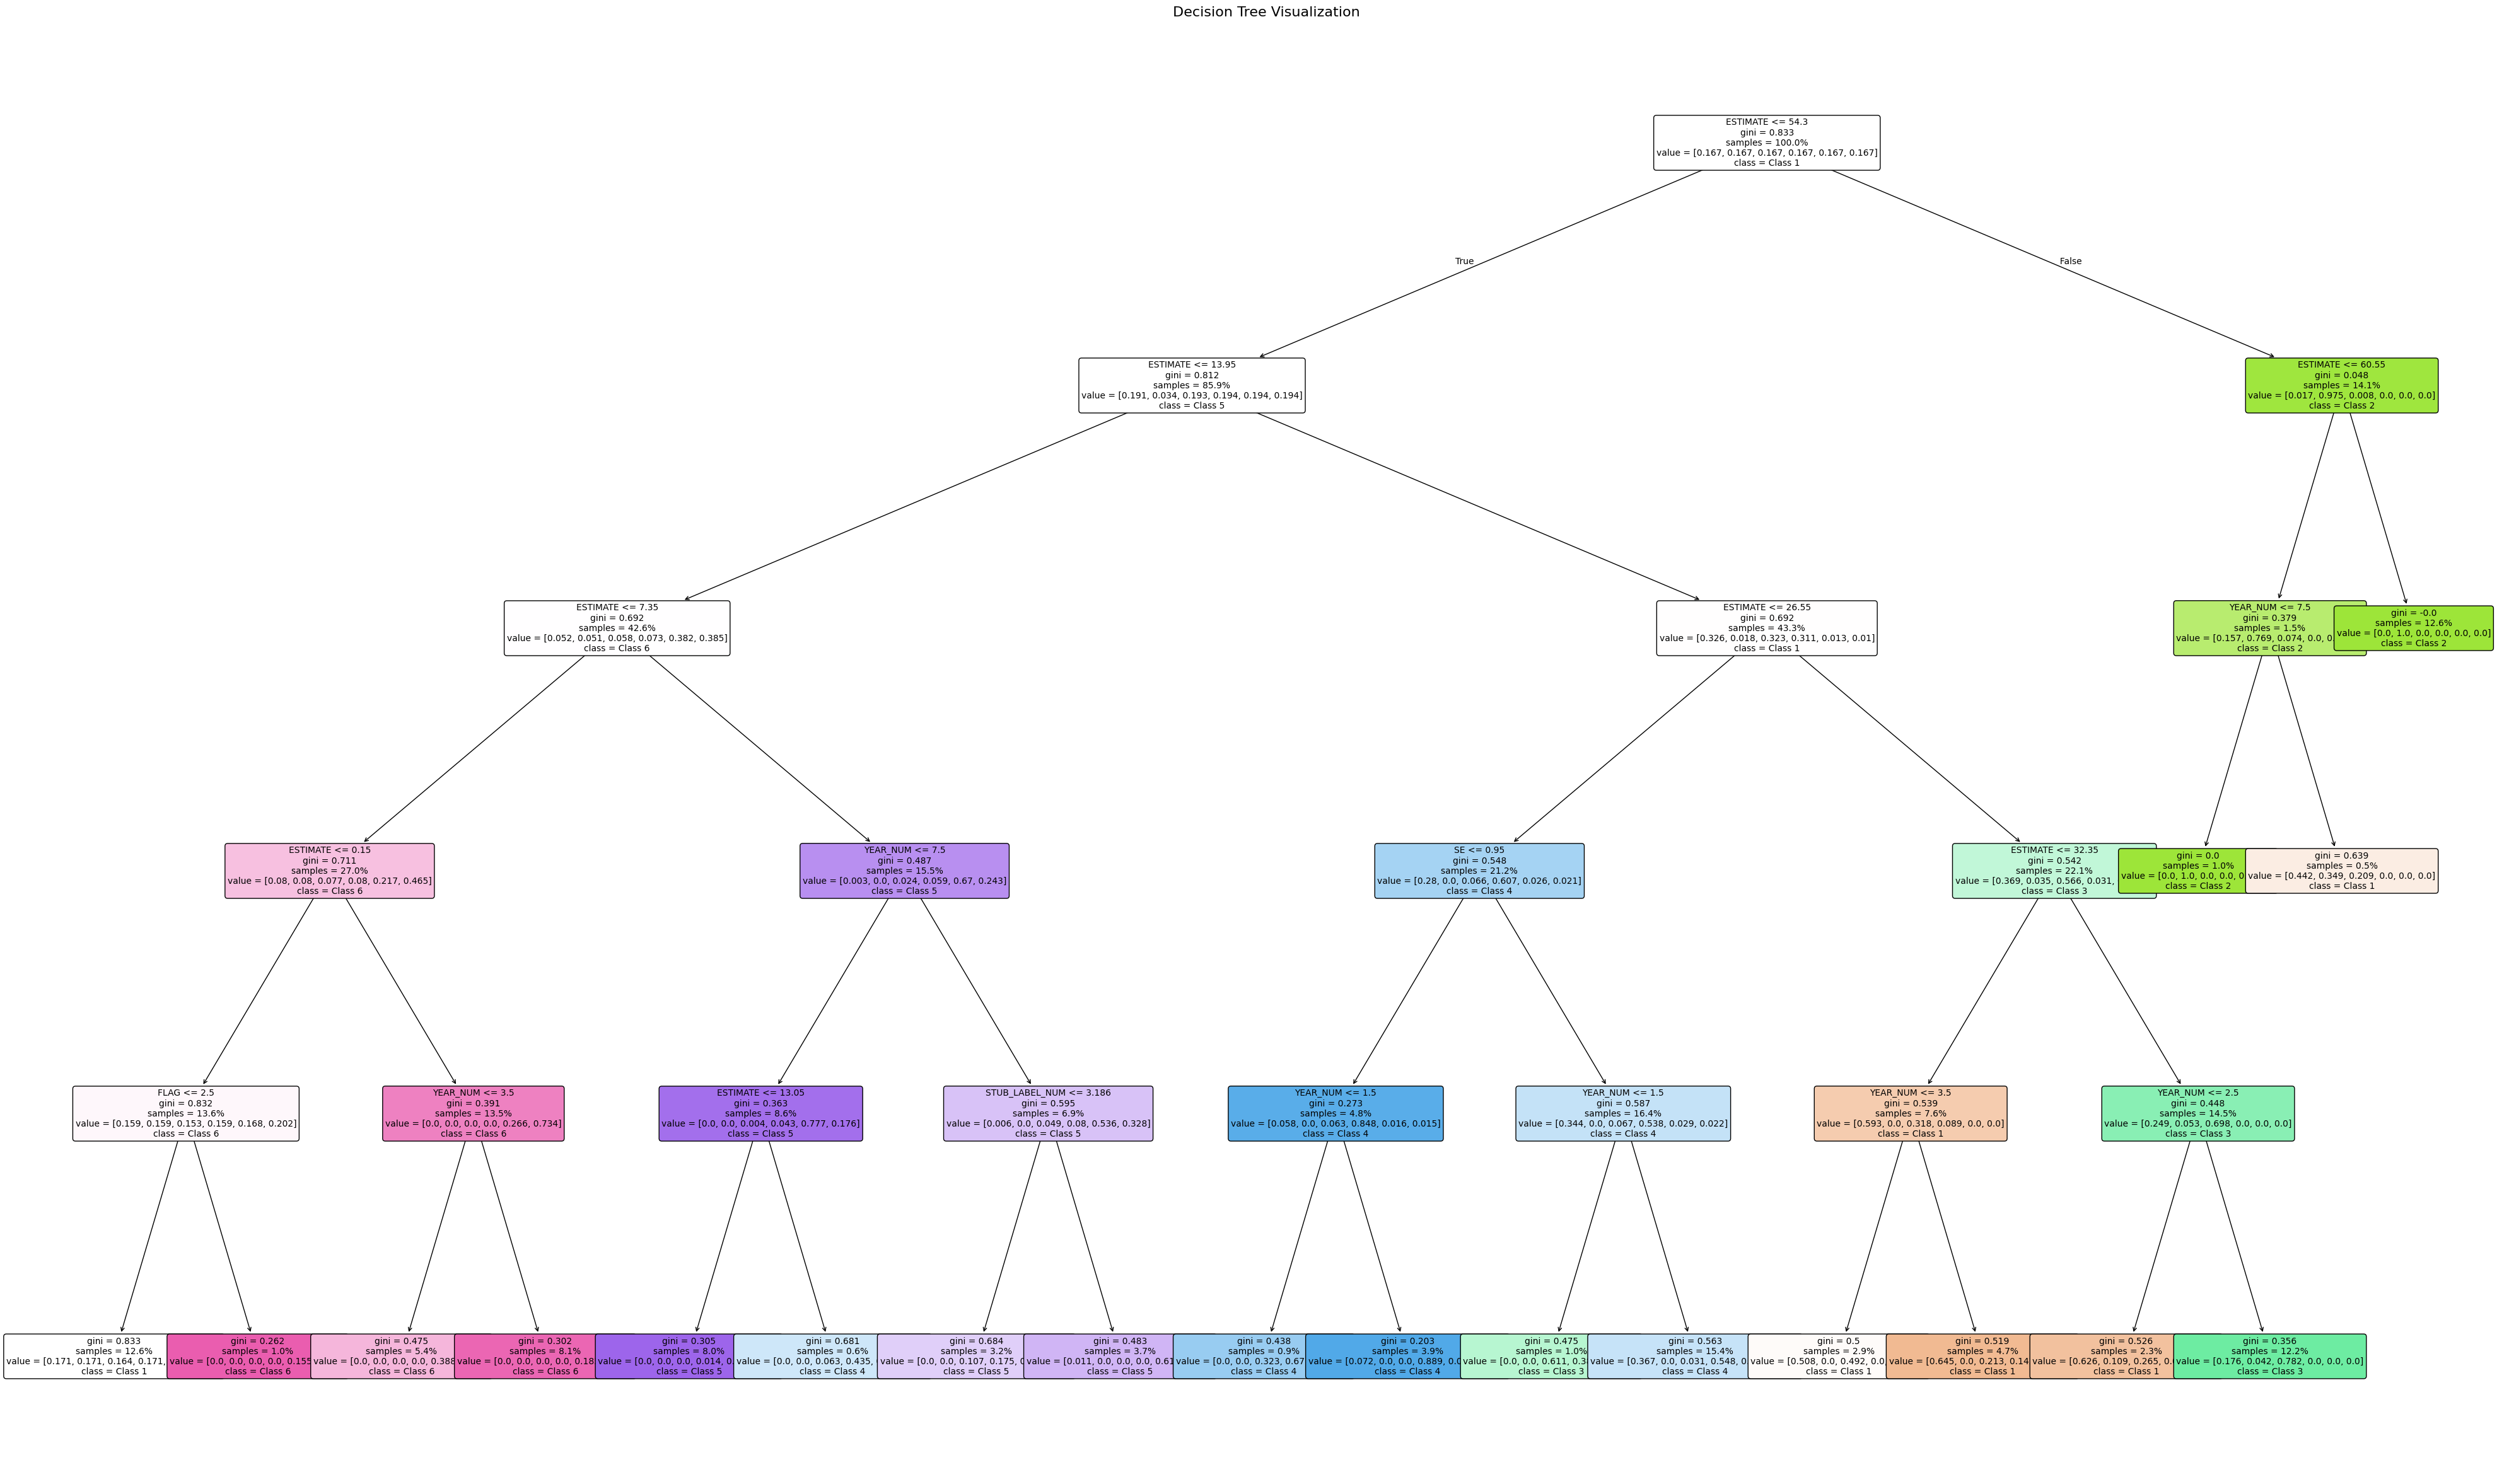

In [250]:
from sklearn.tree import plot_tree


# Set figure size for better visibility
plt.figure(figsize=(50, 30))

# Plot the decision tree
plot_tree(
    decisionTree,
    filled=True,
    rounded=True,
    feature_names=X.columns,
    class_names=[ "Class 1", "Class 2", "Class 3","Class 4","Class 5","Class 6"],
    fontsize=10,
    proportion=True
)

# Add a title for clarity
plt.title(" Decision Tree Visualization", fontsize=16)

# Display the tree
plt.show()

**### Explain briefly the question. What is the role of gini in decision tree? (10 points)

The Gini Index in decision trees is mainly used to determine the quality of a split at any given decision node. It can be thought of as a measure for a node's impurity or homogeneity-that is, how well samples of one node belong to one particular class. If all samples within a node are from the same class, a node is said to be pure, and the Gini Index will have its lowest value. If the node contains samples from both classes, the Gini Index will be higher, indicating that it is more impure.

Decision Trees use the Gini Index to determine which feature and value to consider for the splitting of data. This algorithm calculates the Gini Index for all possible splits featuring all features and selects the one that will result in the most pure child nodes. It does this by comparing the relative distinctness of classes that each split would result in. A good split is defined as one that results in child nodes where a majority of the samples included within them emanate from the same class, hence reducing uncertainty and increasing the surety with which a tree can classify future data.

This ensures that, with every step, the decision tree is closer to the aim by partitioning the data further into smaller groups that are quite homogenous in nature, yielding an evident and logical structure necessary to derive predictions. The popularity of Gini Index results from the fact that this measurement is computational, thus quite fast, and corresponds perfectly to the objective of achieving a well-performing decision tree with regard to classification problems.